# Librerías

In [1]:
#Importamos las librerías estándar
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Conexión al repositorio de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de imagen como tensor

In [3]:
#Una imagen a colores está representada por diferentes canales de colores
#Clásicamente son RGB
#Pueden ser otros, por ejemplo CMYK, en este caso tendríamos 4 canales

In [4]:
#Vamos a probar esto con una imagen a colores
#Importamos la librería para leer imágenes
from PIL import Image

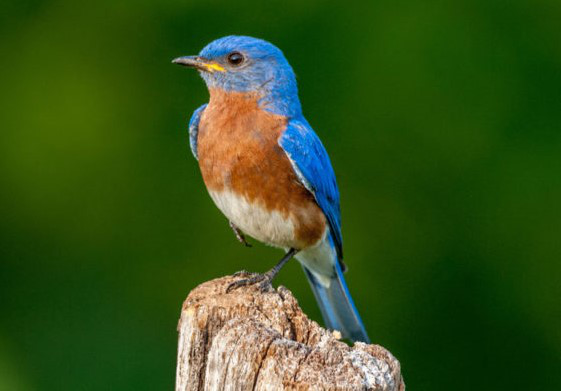

In [5]:
#Leemos la imagen
imagen = Image.open('/content/drive/MyDrive/Data/ave.jpg')
imagen

In [6]:
#La convertimos en una matriz (usaremos el término correcto: un tensor)
#Vemos que tiene valores de 1 a 255
### aunque estas matrices no no sproporcinan información iportante.
imagen_tensor = np.asarray(imagen)
imagen_tensor

array([[[ 25,  65,   2],
        [ 24,  64,   1],
        [ 23,  63,   0],
        ...,
        [ 35,  77,   3],
        [ 35,  77,   3],
        [ 36,  76,   3]],

       [[ 25,  65,   2],
        [ 24,  64,   1],
        [ 23,  63,   0],
        ...,
        [ 34,  76,   2],
        [ 35,  77,   3],
        [ 36,  76,   3]],

       [[ 24,  64,   1],
        [ 24,  64,   1],
        [ 24,  64,   1],
        ...,
        [ 33,  75,   1],
        [ 34,  76,   2],
        [ 35,  75,   2]],

       ...,

       [[ 61, 102,  23],
        [ 61, 102,  23],
        [ 61, 102,  23],
        ...,
        [  5,  47,   1],
        [  5,  47,   1],
        [  6,  48,   2]],

       [[ 61, 102,  23],
        [ 61, 102,  23],
        [ 60, 101,  22],
        ...,
        [  5,  47,   1],
        [  5,  47,   1],
        [  5,  47,   1]],

       [[ 61, 102,  23],
        [ 60, 101,  22],
        [ 60, 101,  22],
        ...,
        [  5,  47,   1],
        [  5,  47,   1],
        [  5,  47,   1]]

In [7]:
#Vemos que es una imagen de 391x561 pixeles, de 3 canales
imagen_tensor.shape

(391, 561, 3)

# Visualizando cada canal de color por separado

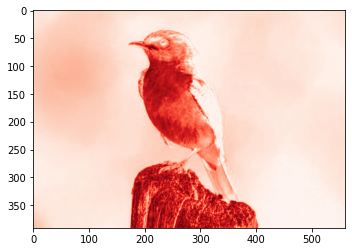

In [8]:
#Veamos cada canal, primero el R (0)
imagen_tensor_canal_r = imagen_tensor[:, :, 0]

#Lo graficamos
plt.imshow(imagen_tensor_canal_r, cmap = 'Reds')

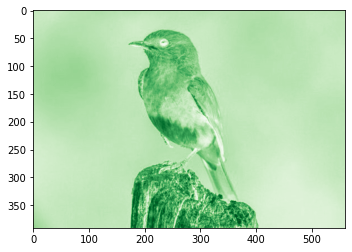

In [9]:
#El G (1)
imagen_tensor_canal_g = imagen_tensor[:, :, 1]

#Lo graficamos
plt.imshow(imagen_tensor_canal_g, cmap = 'Greens')

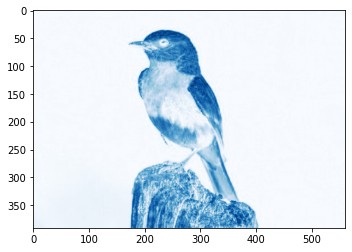

In [10]:
#El B (2)
imagen_tensor_canal_b = imagen_tensor[:, :, 2]

#Lo graficamos
plt.imshow(imagen_tensor_canal_b, cmap = 'Blues')

# Convirtiendo un tensor a un array de Features

In [11]:
#Si quisieramos que esta imagen fuese procesada por una red neuronal, 
#tenemos que convertir este tensor a un vector de features para que la red lo pueda procesar, 
#multiplicando los píxeles
# 391*561 son los pixeles de la imagen, y reducimos la dimensionalidad en 1.
x = imagen_tensor.reshape(-1, 391*561)
x

array([[25, 65,  2, ..., 13, 62,  0],
       [21, 68, 24, ..., 33, 68,  0],
       [33, 68,  0, ...,  5, 47,  1]], dtype=uint8)

In [12]:
#Si hacemos sólo un reshape, obtenemos para una imagen 3 filas de 219351 features, 
###en cada fila está un canal (R, G, B)
x.shape

(3, 219351)

In [13]:
#Tenemos que multiplicar también los canales para tener un vector de features
x = imagen_tensor.reshape(-1, 391*561*3)
x

array([[25, 65,  2, ...,  5, 47,  1]], dtype=uint8)

In [14]:
#De esta manera, la imagen estará representada por 658053 (seicientos cincuenta y ocho mil cincuenta y tres features: x1, x2, x3, ..., x658053)
x.shape

(1, 658053)

In [15]:
#Ya tenemos nuestra imagen a color represantada en forma de features
#Una vez que tengamos la representación en features, para la red es independiente de si es una imagen de colores o blanco y negro
#Hemos visto que al tener más de un canal de colores, nuestro vector de features se hará más grande
#Las técnicas que aprenderemos son independientes del tipo de canales de colores que tenga la imagen, podremos aplicarlas a cualquier escala de colores (gray, RGB, CMYK, alfa, etc)